In [30]:
import numpy as np
import pandas as pd

train = pd.read_csv('AID604AID644_AllRed_train.csv')
test = pd.read_csv('AID604AID644_AllRed_test.csv')


In [31]:
test.head(5)

,NEG_01_NEG,NEG_02_NEG,NEG_03_NEG,NEG_04_NEG,NEG_05_NEG,NEG_06_NEG,NEG_07_NEG,NEG_03_POS,NEG_04_POS,NEG_05_POS,...,WBN_LP_H_100,XLogP,PSA,NumRot,NumHBA,NumHBD,MW,BBB,BadGroup,Outcome
0,0,0,0,0,0,0,0,0,0,0,...,3.64,1.75,46.53,3,3,1,230.26,1,0,Inactive
1,0,0,0,0,0,0,0,0,0,0,...,3.42,1.56,89.05,2,5,1,350.43,0,3,Inactive
2,0,0,0,0,0,0,0,0,0,0,...,3.31,-2.39,235.95,10,12,2,471.54,0,0,Inactive
3,0,0,0,0,0,0,0,0,0,0,...,3.66,2.52,224.45,14,15,5,807.88,0,2,Inactive
4,0,0,0,0,0,0,0,0,0,0,...,3.32,-0.06,115.85,5,7,3,285.28,0,1,Inactive


In [32]:
def outcome_to_numeric(x):
    if x=='Inactive':
        return 0
    if x=='Active':
        return 1

In [33]:
# Apply function to label column
train['label'] = train['Outcome'].apply(outcome_to_numeric)
test['label'] = test['Outcome'].apply(outcome_to_numeric)
test.head()

,NEG_01_NEG,NEG_02_NEG,NEG_03_NEG,NEG_04_NEG,NEG_05_NEG,NEG_06_NEG,NEG_07_NEG,NEG_03_POS,NEG_04_POS,NEG_05_POS,...,XLogP,PSA,NumRot,NumHBA,NumHBD,MW,BBB,BadGroup,Outcome,label
0,0,0,0,0,0,0,0,0,0,0,...,1.75,46.53,3,3,1,230.26,1,0,Inactive,0
1,0,0,0,0,0,0,0,0,0,0,...,1.56,89.05,2,5,1,350.43,0,3,Inactive,0
2,0,0,0,0,0,0,0,0,0,0,...,-2.39,235.95,10,12,2,471.54,0,0,Inactive,0
3,0,0,0,0,0,0,0,0,0,0,...,2.52,224.45,14,15,5,807.88,0,2,Inactive,0
4,0,0,0,0,0,0,0,0,0,0,...,-0.06,115.85,5,7,3,285.28,0,1,Inactive,0


In [34]:
# Drop categorical column
train=train.drop('Outcome', axis=1)
test=test.drop('Outcome', axis=1)

In [35]:
# Split datasets into feature and label dataframes
x_train = train.drop('label', axis=1)
y_train = train['label']

x_test = test.drop('label', axis=1)
y_test = test['label']

In [40]:
>>> from sklearn.svm import LinearSVC
>>> from sklearn.pipeline import make_pipeline
>>> from sklearn.preprocessing import StandardScaler
>>> from sklearn.datasets import make_classification
>>> x, y = make_classification(n_features=4, random_state=0)
>>> clf = make_pipeline(StandardScaler(),
...                     LinearSVC(random_state=0, tol=1e-5))
>>> clf.fit(x, y)


Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('linearsvc',
                 LinearSVC(C=1.0, class_weight=None, dual=True,
                           fit_intercept=True, intercept_scaling=1,
                           loss='squared_hinge', max_iter=1000,
                           multi_class='ovr', penalty='l2', random_state=0,
                           tol=1e-05, verbose=0))],
         verbose=False)

In [41]:
>>> print(clf.named_steps['linearsvc'].coef_)

[[0.14144312 0.52678395 0.67978678 0.49307517]]


In [43]:
>>> print(clf.named_steps['linearsvc'].intercept_)

>>> print(clf.predict([[0, 0, 0, 0]]))

[0.16935943]
[1]


In [44]:
import matplotlib.pyplot as plt

In [47]:
def plot_contours(ax, clf, xx, yy, **params):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

TypeError: zip argument #1 must support iteration

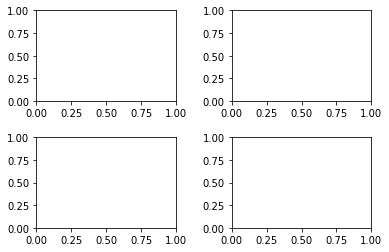

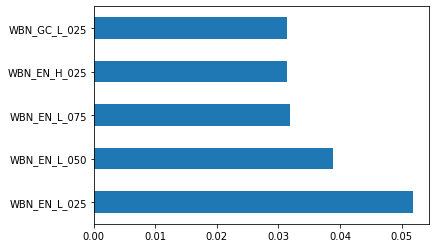

In [21]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
%matplotlib inline

model = ExtraTreesClassifier()
model.fit(x_train, y_train)

feat_importances = pd.Series(model.feature_importances_, index=x_train.columns)
feat_importances.nlargest(5).plot(kind='barh')
plt.show()

In [9]:
x_train = x_train[['WBN_GC_L_0.50', 'WBN_GC_H_1.00', 'MW', 'WBN_EN_H_0.50', 'WBN_EN_H_0.75']]

x_test = x_test[['WBN_GC_L_0.50', 'WBN_GC_H_1.00', 'MW', 'WBN_EN_H_0.50', 'WBN_EN_H_0.75']]

In [18]:
conda install keras

Solving environment: done

## Package Plan ##

  environment location: /Users/kmaddi/opt/anaconda3

  added / updated specs:
    - keras


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    keras-2.3.1                |                0          12 KB
    keras-base-2.3.1           |           py37_0         501 KB
    ------------------------------------------------------------
                                           Total:         513 KB

The following NEW packages will be INSTALLED:

  keras              pkgs/main/osx-64::keras-2.3.1-0
  keras-base         pkgs/main/osx-64::keras-base-2.3.1-py37_0



keras-2.3.1          | 12 KB     | ##################################### | 100% 
keras-base-2.3.1     | 501 KB    | ##################################### | 100% 
Preparing transaction: done
Verifying transaction: done
Executing transaction: done

Note: you may need to restart the kernel to

In [24]:

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.layers.noise import AlphaDropout
from keras import optimizers
from keras import layers


model = Sequential()
model.add(Dense(64, input_dim=154, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

opt = optimizers.Adadelta(lr=.01)

model.compile(loss='binary_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

In [25]:
model.fit(x_train, y_train,
          epochs=30,
          batch_size=128)

Epoch 1/30
47826/47826 [==============================] - 3s 68us/step - loss: 5.5589 - accuracy: 0.5384
Epoch 2/30
47826/47826 [==============================] - 2s 46us/step - loss: 0.3659 - accuracy: 0.9463
Epoch 3/30
47826/47826 [==============================] - 2s 46us/step - loss: 0.0997 - accuracy: 0.9868
Epoch 4/30
47826/47826 [==============================] - 2s 49us/step - loss: 0.0596 - accuracy: 0.9940
Epoch 5/30
47826/47826 [==============================] - 2s 52us/step - loss: 0.0480 - accuracy: 0.9960
Epoch 6/30
47826/47826 [==============================] - 2s 51us/step - loss: 0.0482 - accuracy: 0.9966
Epoch 7/30
47826/47826 [==============================] - 2s 51us/step - loss: 0.0456 - accuracy: 0.9971
Epoch 8/30
47826/47826 [==============================] - 2s 50us/step - loss: 0.0442 - accuracy: 0.9974
Epoch 9/30
47826/47826 [==============================] - 2s 50us/step - loss: 0.0420 - accuracy: 0.9976
Epoch 10/30
47826/47826 [==============================

In [26]:
score = model.evaluate(x_test, y_test, batch_size=128)


11956/11956 [==============================] - 0s 26us/step


In [28]:
score

[0.027110420385824067, 0.9989126920700073]